In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl https://course-v3.fast.ai/setup/colab | bash

from fastai import *
from fastai.vision import *
import numpy as np
import matplotlib.pyplot as plt
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0   1621      0 --:--:-- --:--:-- --:--:--  1621
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = Path('/content/drive/My Drive/HackathonProject/training_set/')
path_test = Path('/content/drive/My Drive/HackathonProject/Test/')
learn = load_learner(path)

In [4]:
os.listdir(path_test)

['433390036760158208_BgO18S3IgAEMR6X.jpg',
 '433390470824464384_BgO2Vj7IMAA_7HY.jpg',
 '433390436166955008_BgO2TixIQAAstb8.jpg',
 '433390763385581568_BgO2ml4IYAAGOyA.jpg',
 '433391004805120000_BgO2lipIgAE_AaA.jpg',
 '433390869719552000_BgONodvCcAAGbza.jpg',
 '433391072694120448_BgO24mkCMAAPIAf.jpg',
 '433391264935845888_BgO3DyuCIAERwTM.jpg',
 '433391624312594432_BgO3Ys8IQAAuIO2.jpg',
 '433391372637569024_BgO3KDgIMAAO-Wn.jpg',
 '433391825047408640_BgOicTYCcAA3-fe.jpg',
 '433391855703584768_BgO3SprIMAAfpd3.jpg',
 'image1.jpg',
 'image2.jpg',
 'image3.jpg',
 'image4.jpg',
 'image5.jpg',
 'image6.jpg',
 'image7.jpg']

In [5]:
learn = load_learner(path, test=ImageList.from_folder(path_test))
preds,y = learn.get_preds(ds_type=DatasetType.Test)
preds

tensor([[9.9665e-01, 3.3507e-03],
        [9.5705e-01, 4.2950e-02],
        [7.4144e-02, 9.2586e-01],
        [6.9361e-01, 3.0639e-01],
        [9.1177e-01, 8.8233e-02],
        [2.2843e-01, 7.7157e-01],
        [9.9828e-01, 1.7167e-03],
        [9.2180e-01, 7.8196e-02],
        [6.4123e-01, 3.5877e-01],
        [9.6919e-01, 3.0815e-02],
        [5.1625e-01, 4.8375e-01],
        [9.7969e-01, 2.0307e-02],
        [7.8365e-01, 2.1635e-01],
        [8.5029e-03, 9.9150e-01],
        [4.7700e-03, 9.9523e-01],
        [1.5929e-03, 9.9841e-01],
        [1.5597e-02, 9.8440e-01],
        [9.9908e-01, 9.1965e-04],
        [9.9301e-01, 6.9926e-03]])

In [0]:
def plotPercentViolent(folderName):
  """function to plot the percent peaceful photos in a batch of images using the trained classifier created with resnet50"""
  #path to the classifier:
  classPath = Path('/content/drive/My Drive/HackathonProject/training_set/')
  #path to the folder with the images:
  path_test = Path('/content/drive/My Drive/HackathonProject/'+ folderName + '/')
  #load the classifier into learn:
  learn = load_learner(classPath, test=ImageList.from_folder(path_test))
  #get predictions for all the images in the folder
  preds,y = learn.get_preds(ds_type=DatasetType.Test)
  #for debug purposes:
  #print(preds)
  #turn predictions into binary decision: 1 = peaceful, 0 = violent
  predictions = preds[:,0]
  #predictions = predictions.eval()
  predictions = list(predictions)
  #print(predictions)
  x = []
  for i in predictions:
    
    if i>.5: 
      print('Peaceful')
      x.append(1)
    else: 
      print('Violent')
      x.append(0)
  
  print(x)
  #define window:
  wd = 5
  winPred = []
  #go through all images and extract a percent value for every 5 consecutive ones:
  p = 0
  while p+wd<=len(x):
    winPred.append(sum(x[p:p+wd])/wd)
    p += 1
  plt.plot(winPred)
  plt.xlabel('time')
  plt.ylabel('percent peaceful images')
    

Peaceful
Peaceful
Violent
Peaceful
Peaceful
Violent
Peaceful
Peaceful
Peaceful
Peaceful
Peaceful
Peaceful
Peaceful
Violent
Violent
Violent
Violent
Peaceful
Peaceful
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1]


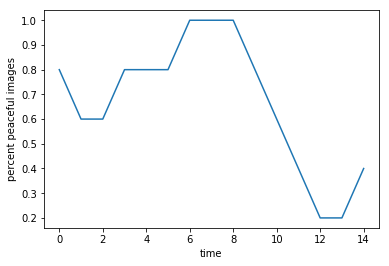

In [50]:
plotPercentViolent('Test')

In [13]:
help(learn.get_preds)


Help on method get_preds in module fastai.basic_train:

get_preds(ds_type:fastai.basic_data.DatasetType=<DatasetType.Valid: 2>, with_loss:bool=False, n_batch:Union[int, NoneType]=None, pbar:Union[fastprogress.fastprogress.MasterBar, fastprogress.fastprogress.ProgressBar, NoneType]=None) -> List[torch.Tensor] method of fastai.basic_train.Learner instance
    Return predictions and targets on `ds_type` dataset.

